# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

An original dataset containing records on 3 million used cars was sampled and limited to 426k car datapoints to optimize processing speed (source: Kaggle, via UC Berkley course). The goal of this analysis is to understand what factors make a car more or less expensive.  

The resulting dataset will be used to provide business insights for a used car dealership.

### Business Understanding

The car dataset will be used to gain insights into key drivers for used car prices.  

The following analysis will clarify which vehicle features positively or negatively impact a car's value(price).  Understanding the correlation between the vehicle features and the resulting prices will create a predictive model to accurately price vehicles the dealership lists for sale.  Additionally, understanding desirable traits for consumers will allow the dealership to make more informed inventory decisions.

The available features for this dataset are listed below:

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read csv file as dataframe
cars_df = pd.read_csv('data/vehicles.csv')
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Understanding

The first step to understanding the data was to do quick cleanin of the data. I utilized the VIN number as a unique ID to drop any duplicate entries.

Next, I worked through the various columns, looking at the list of unique values to better understand the depth of features present in the dataset.

Understanding underlying patterns will facilitate the next stage of data preparation.

manufacturer
acura               49
alfa-romeo           5
aston-martin         2
audi               117
bmw                251
buick               83
cadillac            92
chevrolet          519
chrysler            86
datsun               3
dodge              173
ferrari              5
fiat                17
ford               796
gmc                207
harley-davidson      1
honda              231
hyundai            102
infiniti            81
jaguar              35
jeep               148
kia                 98
land rover           1
lexus              119
lincoln             50
mazda              102
mercedes-benz      265
mercury             28
mini                27
mitsubishi          43
nissan             245
pontiac             57
porsche             39
ram                171
rover               37
saturn              28
subaru             155
tesla               10
toyota             340
volkswagen         143
volvo               70
Name: model, dtype: int64


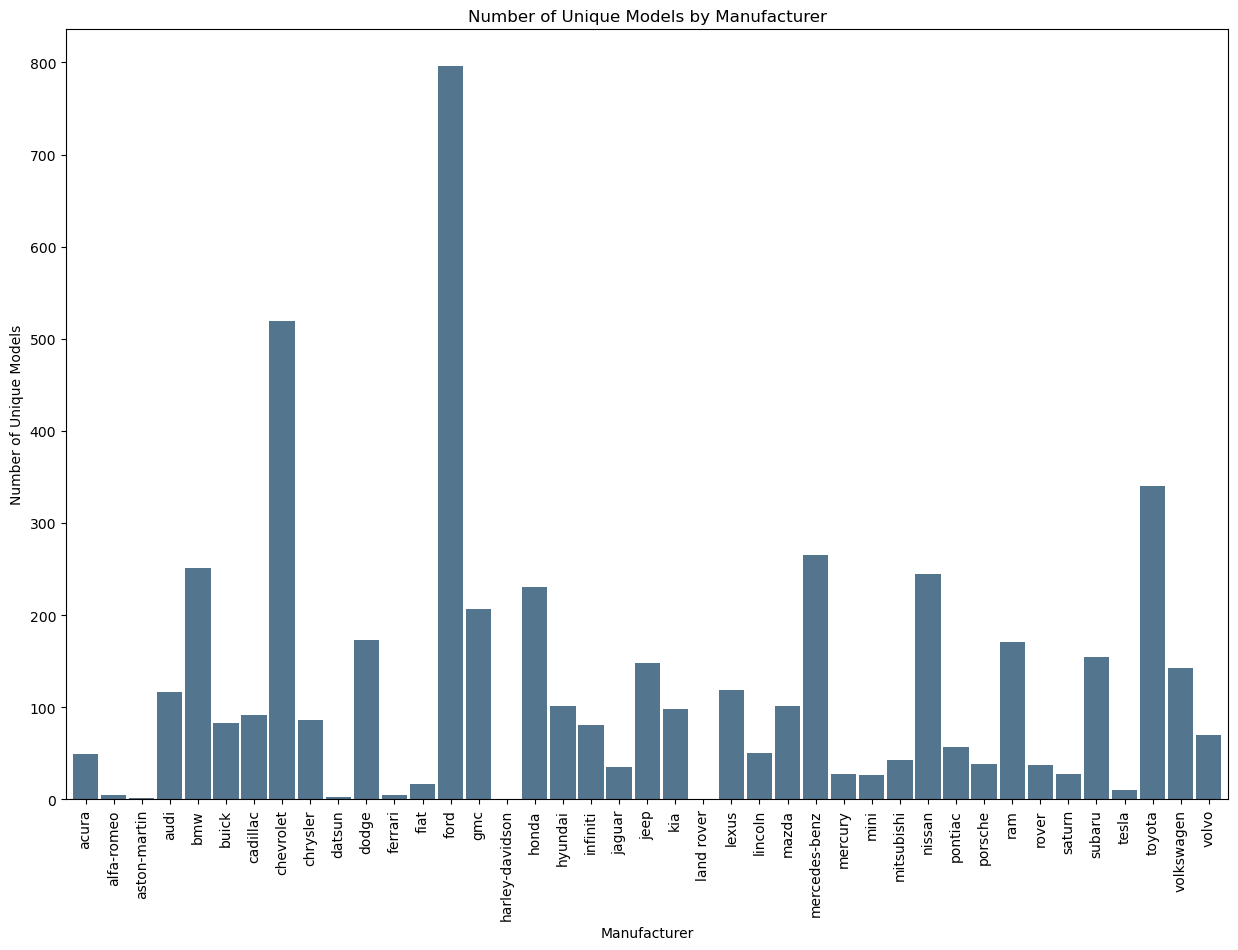

In [36]:
#data cleaning
#drop and rows with duplicate vin values
cars_df = cars_df.drop_duplicates(subset='VIN', keep='first')
cars_df = cars_df.dropna()
#drop columns with missing values
cars_df = cars_df.dropna(axis=1)

#table of the unique values of the 'model', grouped by 'manufacturer
make_table = cars_df.groupby('manufacturer')['model'].nunique()
print(make_table)

#bar chart of the make_table
make_table.plot(kind='bar', width=.9, color='#54758e', figsize=(15, 10))
plt.title('Number of Unique Models by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Unique Models')
plt.show()


In [37]:
#checking out the list of unique models for the manufacturer 'ford', since this value was the highest in the make_table
ford_models = cars_df[cars_df['manufacturer'] == 'ford']['model'].unique()
print(ford_models)

['f-150' 'f-250 super duty xl' 'escape hev' 'transit' 'transit connect'
 'transit 150' 'super duty f-450 drw' 'econoline cargo van'
 'super duty f-550 drw' 'econoline commercial cutaway'
 'super duty f-250 srw' 'f-750' 'econoline'
 'super duty f-750 straight frame' 'super duty f-350 drw' 'f-650 sd'
 'e-series cutaway' 'f-150 supercab xlt' 'transit 250' 'e250' 'f550'
 'escape sel' 'mustang gt premium' 'custom' 'f-150 supercrew limited'
 'fusion sel' 'explorer xlt' 'e150 cargo van' 'expedition xlt' 'escape se'
 'ranger' 'transit connect xlt' 'f250 super duty' 'fusion' 'flex se'
 'focus' 'f-150 xlt 4x2 4dr supercrew' 'mustang' 'f250 king ranch'
 'f-150 xl 4x4' 'f-350 xl cab & chassis' 'expedition platinum 4x4 gas'
 'escape xlt' 'f-150 xlt crew 4x4' 'fiesta' 'f-350 lariat'
 'f350 super duty lariat' 'f350 drw' 'f150 4x4'
 'f150 lariat supercrew 4x4' 'transit xlt' 'mustang premium'
 'f-250 lariat 6.7' 'escape' 'ranger xlt' 'escape limited' 'f-250'
 'f350 super duty 4x4' 'flex' 'f-150 stx' 'f

In [38]:
#understanding the unique values for condition, cylinders, fuel, paint_color, and type
unique_values = {}
unique_values['condition'] = cars_df['condition'].unique()
unique_values['cylinders'] = cars_df['cylinders'].unique()
unique_values['fuel'] = cars_df['fuel'].unique()
unique_values['paint_color'] = cars_df['paint_color'].unique()
unique_values['type'] = cars_df['type'].unique()
print(unique_values)



{'condition': array(['like new', 'excellent', 'fair', 'good', 'new', 'salvage'],
      dtype=object), 'cylinders': array(['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object), 'fuel': array(['gas', 'hybrid', 'diesel', 'other', 'electric'], dtype=object), 'paint_color': array(['white', 'blue', 'silver', 'red', 'grey', 'black', 'brown',
       'green', 'custom', 'yellow', 'orange', 'purple'], dtype=object), 'type': array(['van', 'sedan', 'convertible', 'truck', 'coupe', 'SUV',
       'hatchback', 'wagon', 'pickup', 'other', 'mini-van', 'offroad',
       'bus'], dtype=object)}


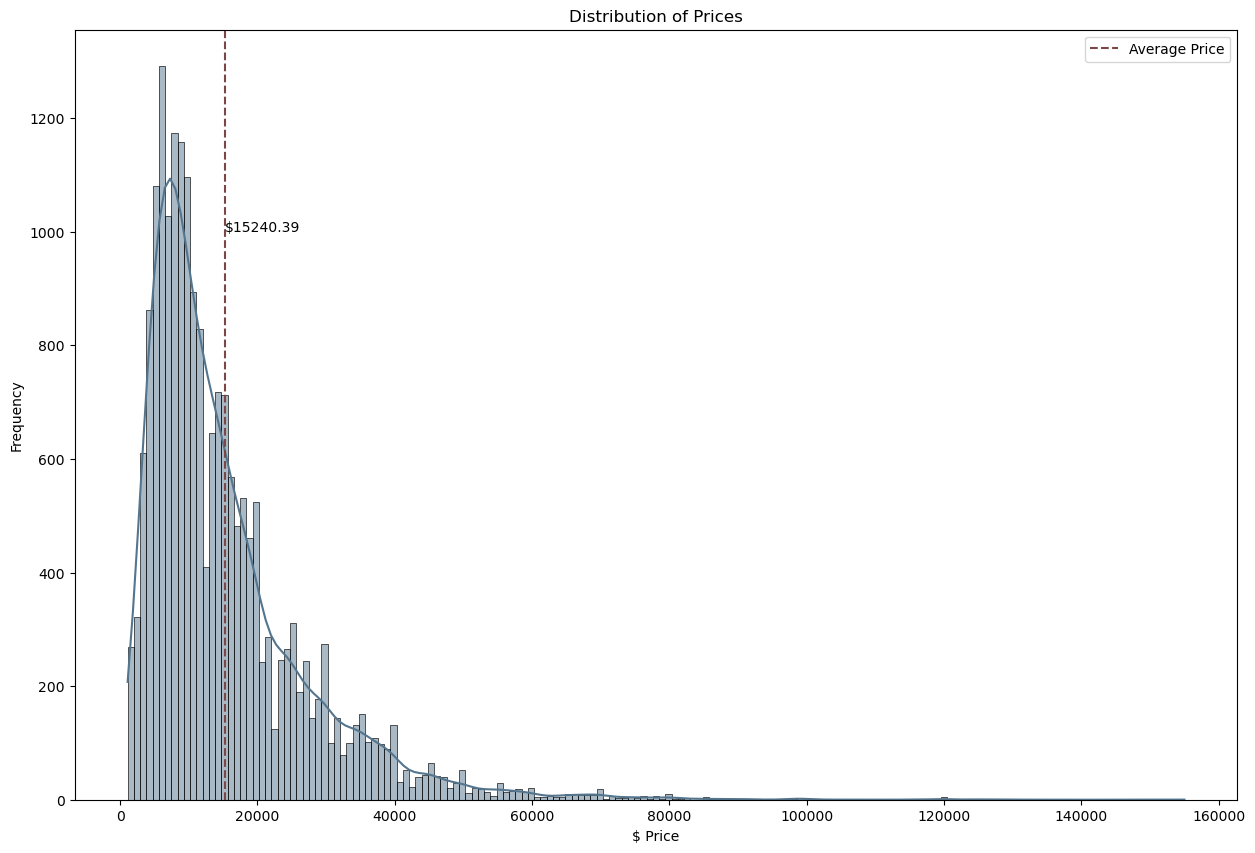

In [39]:
#only included cars with a dollar value greater than $1,000 (originally started by filtering out cars with a price of 0)
cars_df = cars_df[cars_df['price'] > 1000]
#looking at a histogram of the distribution of prices to understand the range of prices
plt.figure(figsize=(15, 10))
sns.histplot(cars_df['price'], kde=True, color='#54758e')
plt.title('Distribution of Prices')
plt.xlabel('$ Price')
plt.ylabel('Frequency')
#create a label for the average price
avg_price = cars_df['price'].mean()
plt.axvline(avg_price, color='#7a4646', linestyle='--', label='Average Price')
# include the value of the average price, and add a legend
plt.text(avg_price, 1000, f'${round(avg_price, 2)}', rotation=0, color='black')
plt.legend()
plt.show()


In [40]:
#after inspecting the histogram, it was clear that some cars had a price of 0, which are not valid entries for this analysis
#I added a line before the histogram to remove these entries, this line of code then serves to verify that the entries were removed
zero_price_cars = cars_df[cars_df['price'] == 0]
print(zero_price_cars)

Empty DataFrame
Columns: [id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state]
Index: []


In [41]:
#looking at the top 20 most expensive cars, as there is a notable right skew on the data
top_20_max_prices = cars_df.nlargest(20, 'price')[['manufacturer', 'model', 'year', 'condition','price']]
print(top_20_max_prices)



         manufacturer                 model    year  condition   price
323687  mercedes-benz         benz sprinter  2020.0        new  155000
91502            ford                escape  2009.0       good  150000
368720          volvo                   s60  2013.0       good  144832
111853          dodge  challenger srt demon  2018.0   like new  135000
234446        porsche                   928  1995.0  excellent  129928
374724       cadillac              escalade  2021.0  excellent  126995
420693        porsche           911 turbo s  2014.0  excellent  125000
170109          rover                 sport  2020.0  excellent  124900
42481         ferrari                  f430  2005.0  excellent  120000
189368        ferrari            360 spider  2005.0   like new  120000
407700           ford                bronco  1969.0  excellent  119999
419656      chevrolet              corvette  2021.0       good  119900
44736           rover          supercharged  2021.0        new  118300
278384

### Data Preparation
After some initial data cleaning during the data research (understanding) process, additional data preparation was completed, including removing non-sensical entries, such as the $150,000 Ford Escape.

The dataset was further prepared feature engineering, which included transforming categorical columns into numeric and scaling the data.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer





In [43]:
#removed row with index 91502, as it was a ford escape with a price of 150,000 (which is not a valid price for this car model)
cars_df = cars_df.drop(91502)
#reviewing the top 20 most expensive cars to confirm thw row was removed    
top_20_max_prices = cars_df.nlargest(20, 'price')[['manufacturer', 'model', 'year', 'price']]
print(top_20_max_prices)

         manufacturer                 model    year   price
323687  mercedes-benz         benz sprinter  2020.0  155000
368720          volvo                   s60  2013.0  144832
111853          dodge  challenger srt demon  2018.0  135000
234446        porsche                   928  1995.0  129928
374724       cadillac              escalade  2021.0  126995
420693        porsche           911 turbo s  2014.0  125000
170109          rover                 sport  2020.0  124900
42481         ferrari                  f430  2005.0  120000
189368        ferrari            360 spider  2005.0  120000
407700           ford                bronco  1969.0  119999
419656      chevrolet              corvette  2021.0  119900
44736           rover          supercharged  2021.0  118300
278384            bmw                  850i  2019.0  115000
113451      chevrolet          corvette lt3  2020.0  109000
4826              bmw                 m805i  2020.0  104900
127952         nissan              gt-r 

In [44]:
#reviewing the top 50 least expensive cars
#when first analyzing the data there were 115 vehicles listed with a price of $1, which were not useful entries for this analysis    
#removing any 'like new' cars with a price less than 2000, as these are likely to be invalid entries
cars_df = cars_df[~((cars_df['condition'] == 'like new') & (cars_df['price'] < 2000))]
#reviewing the top 50 least expensive cars
top_50_min_prices = cars_df.nsmallest(50, 'price')[['manufacturer', 'model', 'year', 'condition', 'price']]
print(top_50_min_prices)

       manufacturer                 model    year  condition  price
5878       chrysler  town and country awd  2001.0       fair   1100
53021         dodge              neon sxt  2005.0       good   1100
57625        subaru        legacy outback  1999.0       fair   1100
254781     cadillac               deville  2004.0       good   1100
284626       toyota                 camry  2005.0       fair   1100
395108         jeep        grand cherokee  2002.0       fair   1100
33675         honda                accord  1994.0       good   1150
296337       nissan            xterra 4x4  2005.0       good   1150
252916        honda                accord  2007.0       good   1195
289380          kia             optima lx  2013.0       fair   1195
17888          ford         econoline van  1981.0       fair   1200
99153         honda              civic ex  2007.0       fair   1200
176027         jeep        grand cherokee  2001.0       fair   1200
239631   mitsubishi               eclipse  2003.

In [45]:

#create a new dataframe to store the cleaned data
cars_clean = cars_df.copy()
#replace the categorical variables with the numerical values
cars_clean['region'] = LabelEncoder().fit_transform(cars_df['region'])
cars_clean['manufacturer'] = LabelEncoder().fit_transform(cars_df['manufacturer'])
cars_clean['model'] = LabelEncoder().fit_transform(cars_df['model'])
cars_clean['condition'] = LabelEncoder().fit_transform(cars_df['condition'])
cars_clean['cylinders'] = LabelEncoder().fit_transform(cars_df['cylinders'])
cars_clean['fuel'] = LabelEncoder().fit_transform(cars_df['fuel'])
cars_clean['title_status'] = LabelEncoder().fit_transform(cars_df['title_status'])
cars_clean['transmission'] = LabelEncoder().fit_transform(cars_df['transmission'])
cars_clean['drive'] = LabelEncoder().fit_transform(cars_df['drive'])
cars_clean['size'] = LabelEncoder().fit_transform(cars_df['size'])
cars_clean['type'] = LabelEncoder().fit_transform(cars_df['type'])
cars_clean['paint_color'] = LabelEncoder().fit_transform(cars_df['type'])
cars_clean['state'] = LabelEncoder().fit_transform(cars_df['type'])
#drop the VIN & ID column, as it is not a useful feature for this analysis
cars_clean = cars_clean.drop(columns=['VIN'])
cars_clean = cars_clean.drop(columns=['id'])
#convert year and odometer to int64
cars_clean['year'] = cars_clean['year'].astype('int64')
cars_clean['odometer'] = cars_clean['odometer'].astype('int64')

print(cars_clean.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20185 entries, 215 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   region        20185 non-null  int64
 1   price         20185 non-null  int64
 2   year          20185 non-null  int64
 3   manufacturer  20185 non-null  int64
 4   model         20185 non-null  int64
 5   condition     20185 non-null  int64
 6   cylinders     20185 non-null  int64
 7   fuel          20185 non-null  int64
 8   odometer      20185 non-null  int64
 9   title_status  20185 non-null  int64
 10  transmission  20185 non-null  int64
 11  drive         20185 non-null  int64
 12  size          20185 non-null  int64
 13  type          20185 non-null  int64
 14  paint_color   20185 non-null  int64
 15  state         20185 non-null  int64
dtypes: int64(16)
memory usage: 2.6 MB
None


In [46]:
#previewing the cleaned dataframe
print(cars_clean.head())

     region  price  year  manufacturer  model  condition  cylinders  fuel  \
215      28   4000  2002            38   1519          0          3     2   
219      28   2500  1995             4    360          1          5     2   
268      28   9000  2008            25   2976          0          3     2   
337      28   8950  2011            13   1848          0          5     2   
338      28   4000  1972            26    710          1          5     2   

     odometer  title_status  transmission  drive  size  type  paint_color  \
215    155000             0             0      1     0     9            9   
219    110661             0             0      2     2     9            9   
268     56700             0             0      2     0     2            2   
337    164000             0             0      1     1    10           10   
338     88100             0             0      2     1     3            3   

     state  
215      9  
219      9  
268      2  
337     10  
338      

     region     price      year  manufacturer     model  condition  cylinders  \
0 -1.368087 -0.925787 -1.048167      1.657653 -0.674368  -0.850812  -1.162486   
1 -1.368087 -1.049263 -1.940567     -1.336837 -1.526460  -0.004570   0.390907   
2 -1.368087 -0.514204 -0.283254      0.512701  0.396813  -0.850812  -1.162486   
3 -1.368087 -0.518319  0.099203     -0.544178 -0.432488  -0.850812   0.390907   
4 -1.368087 -0.925787 -4.872736      0.600774 -1.269142  -0.004570   0.390907   

       fuel  odometer  title_status  transmission     drive      size  \
0  0.193884  0.435041     -0.207987     -0.252392  0.329875 -1.792110   
1  0.193884 -0.021511     -0.207987     -0.252392  1.654690  1.143832   
2  0.193884 -0.577139     -0.207987     -0.252392  1.654690 -1.792110   
3  0.193884  0.527712     -0.207987     -0.252392  0.329875 -0.324139   
4  0.193884 -0.253818     -0.207987     -0.252392  1.654690 -0.324139   

       type  paint_color     state  
0  0.746053     0.746053  0.746053  


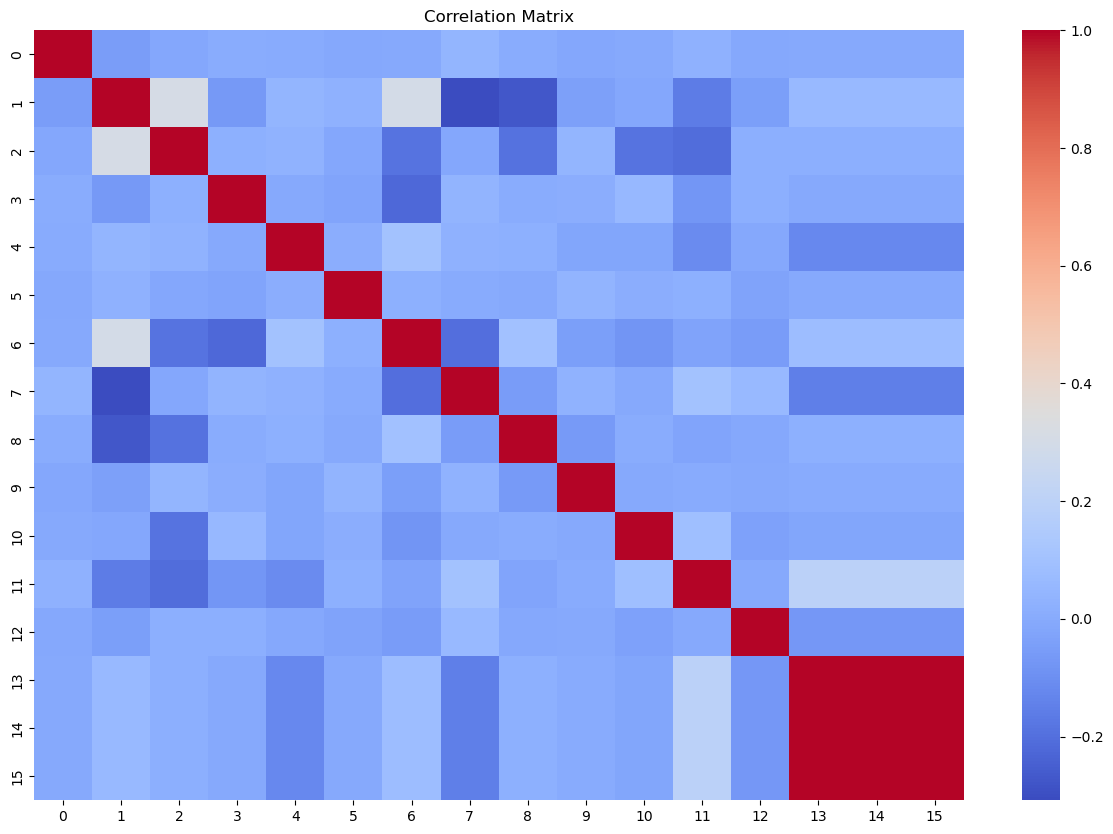

[('price', 'year', 0.3080399283933885), ('price', 'fuel', -0.30820559969955175), ('year', 'price', 0.30803992839338845), ('fuel', 'price', -0.30820559969955175)]


In [47]:
#scaling the cars_clean dataframe
scaler = StandardScaler()
cars_clean_scaled = scaler.fit_transform(cars_clean)
#add the original column names to the scaled data
cars_clean_scaled = pd.DataFrame(cars_clean_scaled, columns=cars_clean.columns)
print(cars_clean_scaled.head())

#correlation matrix of the cars_clean dataframe
correlation_matrix = np.corrcoef(cars_clean_scaled.T)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#list of column names for the correlation matrix
columns = cars_clean.columns
#use the correlation matrix to identify the features with a correlation greater than 0.8 and less than 1
high_correlation = []
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix[i])):
        if i != j and abs(correlation_matrix[i][j]) > 0.3 and abs(correlation_matrix[i][j]) < 1:
            high_correlation.append((columns[i], columns[j], correlation_matrix[i][j]))
print(high_correlation)


### Modeling

Data was modeled using linear regression, ridge regression, and Lasso regression.  In each instance, price was the target variable.

In [48]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
import warnings
# Suppress UserWarning from scikit-learn
warnings.filterwarnings("ignore", category=UserWarning)

In [49]:
#convert the cars_clean_scaled into a dataframe
cars_clean_scaled = pd.DataFrame(cars_clean_scaled, columns=cars_clean.columns)
#split the data into the target and features
X = cars_clean_scaled.drop(columns=['price'])
y = cars_clean_scaled['price']

#linear regression to identify the most important features
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
#identify the most important features
feature_importance = linreg.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.abs()
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


cylinders       0.333185
year            0.315492
odometer        0.264733
fuel            0.237663
transmission    0.080854
drive           0.079010
title_status    0.046897
region          0.029924
condition       0.021836
size            0.013487
type            0.004893
paint_color     0.004893
state           0.004893
model           0.002614
manufacturer    0.001506
dtype: float64


In [50]:
#linear regression model to predict price of the car based on the most important features
#split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the linear regression model to the training data
pipe_lin = Pipeline([('linreg', LinearRegression())])
pipe_lin.fit(X_train, y_train)
# predict the price of the car based on the test data
y_pred = linreg.predict(X_test)
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))



Mean Absolute Error: 0.5068330526222997
Mean Squared Error: 0.6152979184711672
Root Mean Squared Error: 0.7844092799496748
R2 Score: 0.35461193014609493


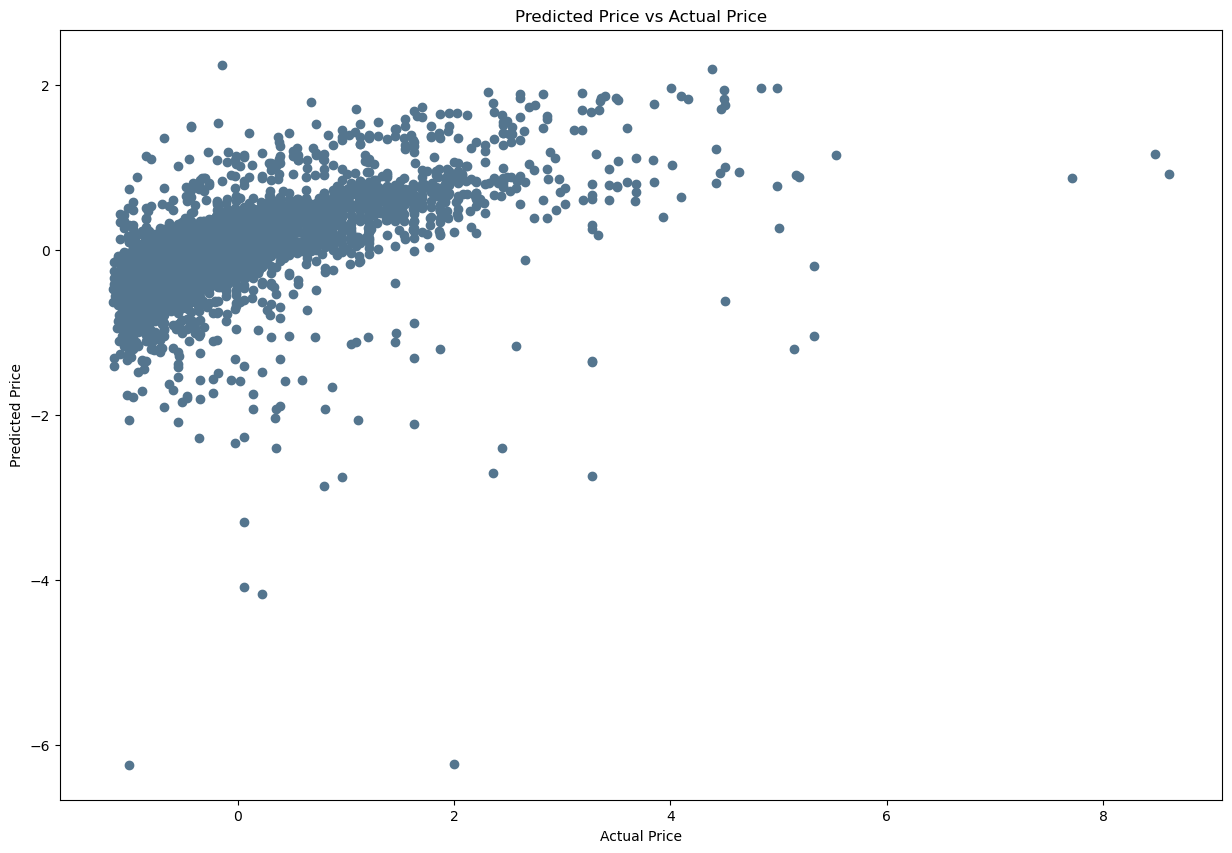

In [51]:
#plot of the predicted price vs the actual price
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred, color='#54758e')
plt.title('Predicted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [52]:
# Pipe with a 4-columns selector and a linear regression on all features
pipe_4 = Pipeline([
    ('column_selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=4)),
    ('linreg', LinearRegression())
    ])
pipe_4.fit(X_train, y_train)
#print best feautres
print(pipe_4.named_steps['column_selector'].get_support())
print(X.columns[pipe_4.named_steps['column_selector'].get_support()])
#predict the price of the car based on the test data
y_pred_4 = pipe_4.predict(X_test)
#evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_4))

[False  True False False False  True  True False False  True False False
 False False False]
Index(['year', 'cylinders', 'fuel', 'transmission'], dtype='object')
Mean Absolute Error: 0.5605813100857937
Mean Squared Error: 0.7173959208176338
Root Mean Squared Error: 0.8469922790779346
R2 Score: 0.247520989819091


Mean Absolute Error: 0.5091287551948463
Mean Squared Error: 0.6224856064628356
Root Mean Squared Error: 0.7889775703166951
R2 Score: 0.34707273987680054
[-0.02793664  0.33437356  0.00857915  0.00329284  0.02269236  0.33799864
 -0.24446195 -0.24248552 -0.04525194  0.08209265 -0.06988471 -0.01135067
  0.00337435  0.00337435  0.00337435]
Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


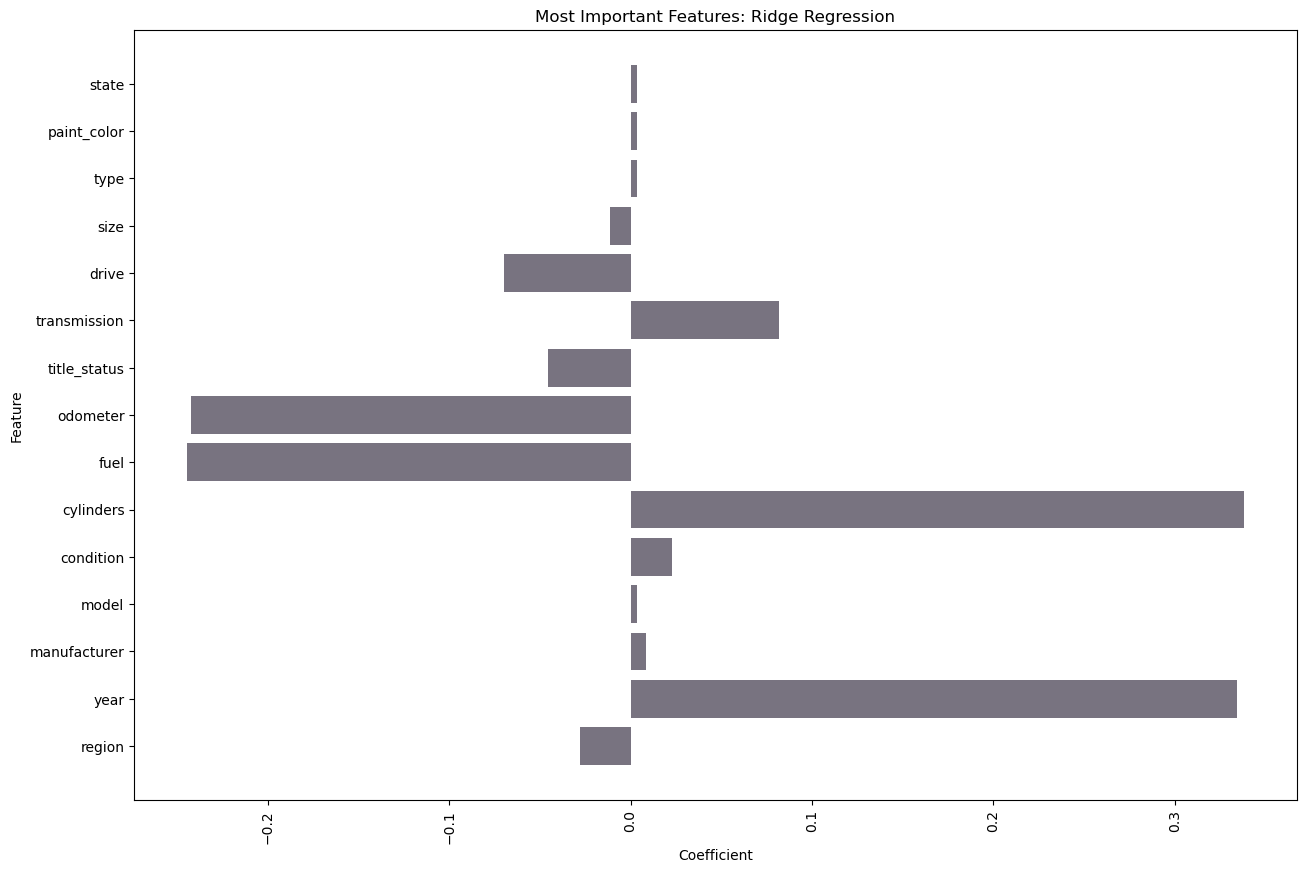

In [53]:
#ridge regression model to predict price of the car based on the most important features
pipe_ridge = Pipeline([('ridge', Ridge())])
pipe_ridge.fit(X_train, y_train)
# predict the price of the car based on the test data
y_pred = pipe_ridge.predict(X_test)
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

#show the features selected with the ridge regression model
print(pipe_ridge.named_steps['ridge'].coef_)
print(X.columns[pipe_ridge.named_steps['ridge'].coef_ != 0])

#bar chart of the most important features
plt.figure(figsize=(15, 10))
plt.barh(X.columns, pipe_ridge.named_steps['ridge'].coef_, color='#787380')
plt.title('Most Important Features: Ridge Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()







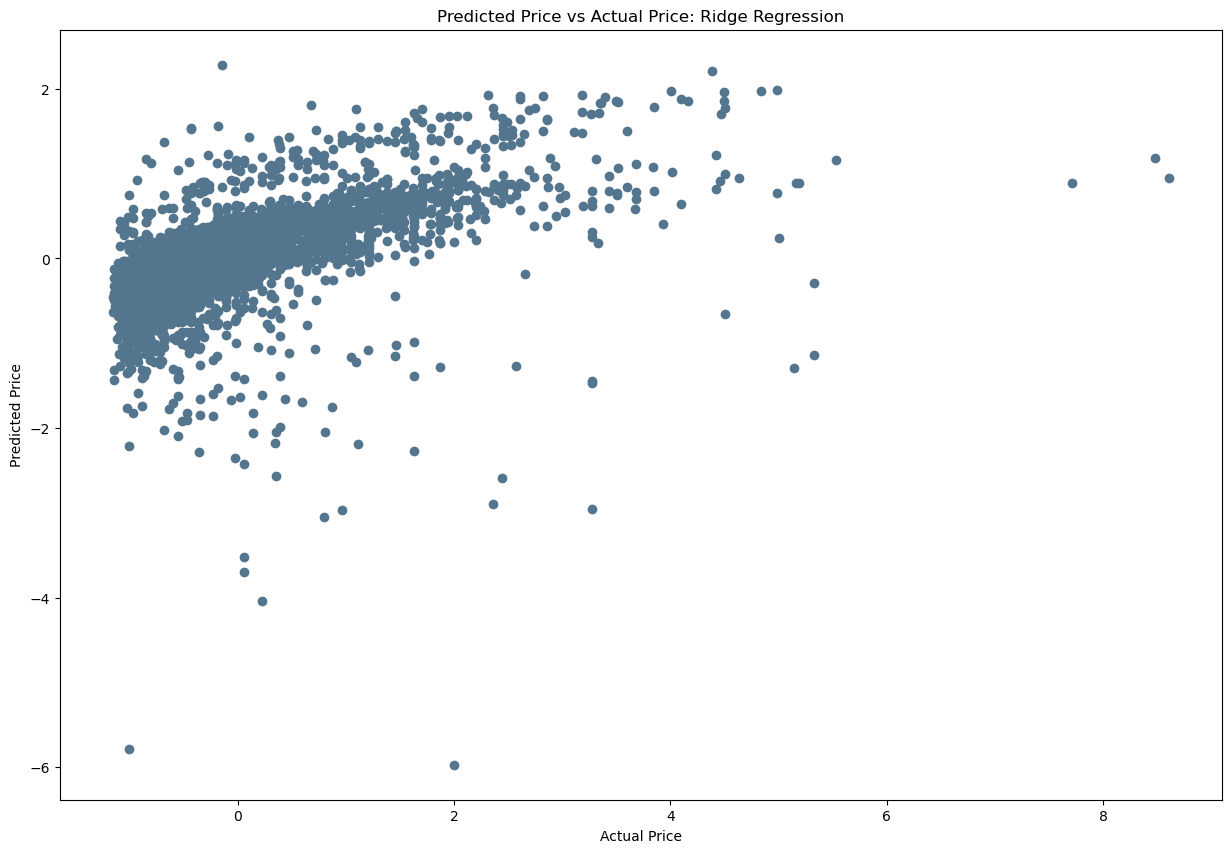

In [54]:
#plot of the predicted price vs the actual price for the ridge regression model
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred, color='#54758e')
plt.title('Predicted Price vs Actual Price: Ridge Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [55]:
#create a list of the fuel types
fuel_types = cars_df['fuel'].unique()
#group the cars by fuel type and calculate the average price
fuel_avg_price = cars_df.groupby('fuel')['price'].mean()
fuel_avg_price = fuel_avg_price.round(2)
#create a new dataframe to store the results
fuel_avg_price_df = pd.DataFrame(fuel_avg_price)
fuel_avg_price_df


,price
fuel,
diesel,31428.44
electric,20202.39
gas,14375.64
hybrid,11585.57
other,12896.12


In [56]:
#create a list of cylinder types by average price
cylinder_avg_price = cars_df.groupby('cylinders')['price'].mean()
cylinder_avg_price = cylinder_avg_price.round(2)
#create a new dataframe to store the results
cylinder_avg_price_df = pd.DataFrame(cylinder_avg_price)
cylinder_avg_price_df

,price
cylinders,
10 cylinders,18280.94
12 cylinders,14323.55
3 cylinders,12467.76
4 cylinders,11098.01
5 cylinders,9150.49
6 cylinders,15126.20
8 cylinders,21281.94
other,16999.03


In [57]:
#average car price by manufacturer 
manufacturer_avg_price = cars_df.groupby('manufacturer')['price'].mean()
manufacturer_avg_price = manufacturer_avg_price.round(2)

#dataframe to store the results
manufacturer_avg_price_df = pd.DataFrame(manufacturer_avg_price)
#show the number of cars by manufacturer
manufacturer_avg_price_df['number_of_cars'] = cars_df['manufacturer'].value_counts()
manufacturer_avg_price_df['average_year'] =cars_df.groupby('manufacturer')['year'].mean().round(0)
manufacturer_avg_price_df

,price,number_of_cars,average_year
manufacturer,,,
acura,11851.89,173,2010.0
alfa-romeo,20488.89,9,2001.0
aston-martin,50925.00,2,2004.0
audi,16997.55,275,2012.0
bmw,16017.11,576,2010.0
buick,11232.20,257,2009.0
cadillac,15993.51,273,2009.0
chevrolet,16918.42,2768,2009.0
chrysler,9351.30,366,2009.0


In [58]:
#create a Lasso regression model to predict price of the car based on the most important features
# Pipe on a scaler + Lasso with grid search + 5-Fold cross validation
pipe_L_param_dict = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}
pipe_L = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
pipe_L_grid = GridSearchCV(pipe_L, param_grid=pipe_L_param_dict, cv=5)
pipe_L_grid.fit(X_train, y_train)

#print the most important features of the Lasso regression model
print(pipe_L_grid.best_estimator_.named_steps['lasso'].coef_)
print(X.columns[pipe_L_grid.best_estimator_.named_steps['lasso'].coef_ != 0])

#evaluate the lasso regression model
y_pred_L = pipe_L_grid.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_L))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_L))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_L)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_L))



[-0.          0.22694411 -0.          0.          0.          0.22024784
 -0.17591931 -0.1541112  -0.          0.         -0.         -0.
  0.          0.          0.        ]
Index(['year', 'cylinders', 'fuel', 'odometer'], dtype='object')
Mean Absolute Error: 0.558947970891805
Mean Squared Error: 0.6727171002659741
Root Mean Squared Error: 0.8201933310299311
R2 Score: 0.2943847559615663


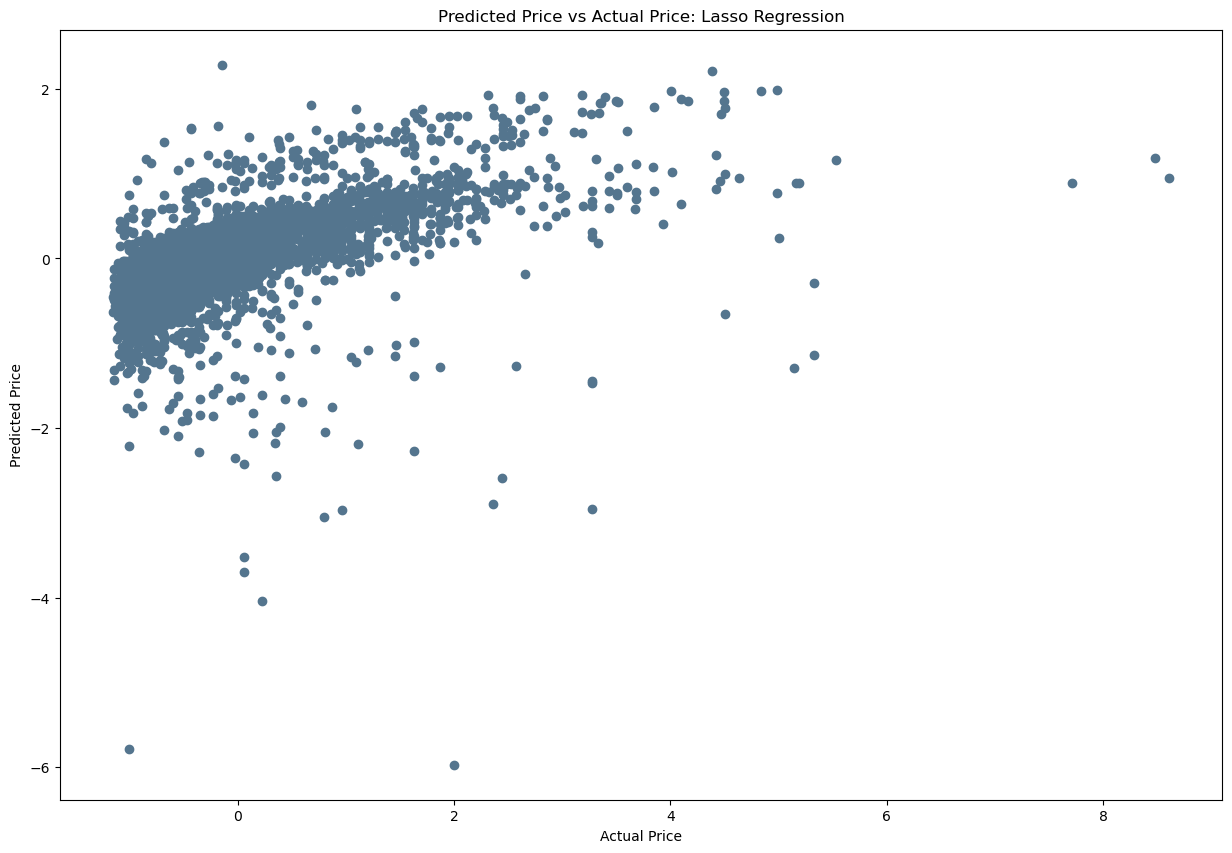

In [59]:
#create a plot of the predicted price vs the actual price for the Lasso regression model
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred, color='#54758e')
plt.title('Predicted Price vs Actual Price: Lasso Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Evaluation

With the linear regression, ridge regression, and lasso regression complete, the results of each model were compared.

All models showed that the year, odometer, cylinders and fuel types were most important; however they appeared in differenct orders of importance.

In [60]:
#determining the most important features by model
most_important_features = pd.DataFrame({'Linear Regression': ['cylinders','year', 'odometer', 'fuel'],
                                       'Ridge Regression': ['odometer', 'fuel', 'cylinders', 'year'],
                                       'Lasso Regression': ['year', 'cylinders', 'odometer', 'fuel']})
most_important_features


,Linear Regression,Ridge Regression,Lasso Regression
0,cylinders,odometer,year
1,year,fuel,cylinders
2,odometer,cylinders,odometer
3,fuel,year,fuel


In [61]:
#create a dataframe to store the mean absolute error, mean squared error, root mean squared error, and R2 score for each model
model_evaluation = pd.DataFrame({'Linear Regression': [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)],
                                'Ridge Regression': [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)],
                                'Lasso Regression': [metrics.mean_absolute_error(y_test, y_pred_L), metrics.mean_squared_error(y_test, y_pred_L), np.sqrt(metrics.mean_squared_error(y_test, y_pred_L)), metrics.r2_score(y_test, y_pred_L)]},
                               index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'])
model_evaluation


,Linear Regression,Ridge Regression,Lasso Regression
Mean Absolute Error,0.509129,0.509129,0.558948
Mean Squared Error,0.622486,0.622486,0.672717
Root Mean Squared Error,0.788978,0.788978,0.820193
R2 Score,0.347073,0.347073,0.294385


In [62]:

#determine the best model
best_model = model_evaluation.idxmax(axis=1)
best_model = pd.DataFrame(best_model, columns=['Best Model'])
print(best_model)






                                Best Model
Mean Absolute Error       Lasso Regression
Mean Squared Error        Lasso Regression
Root Mean Squared Error   Lasso Regression
R2 Score                 Linear Regression


### Deployment
Visualizing the results of the regression models for further understanding.

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.49531151  0.19080773  1.79090299 ...  0.15772533 -0.70002893
 -0.26140948].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

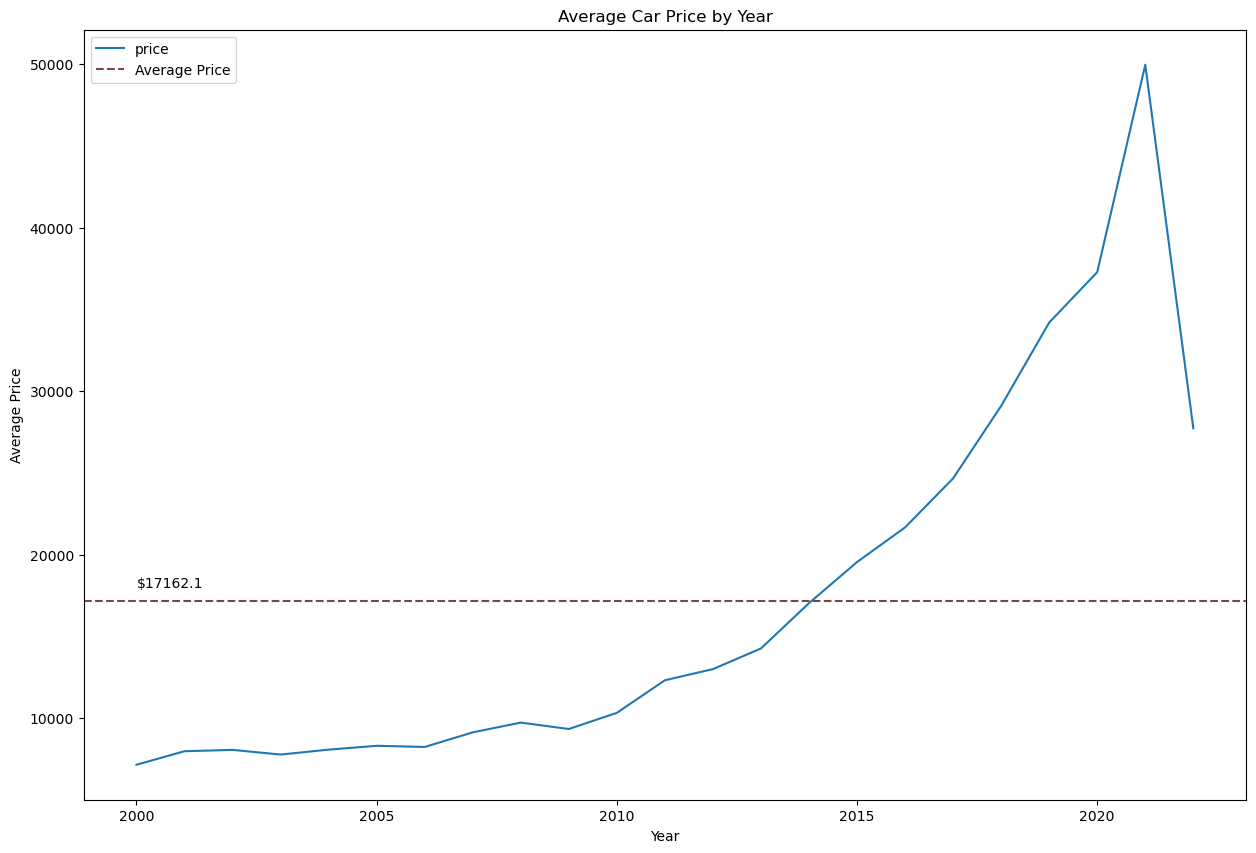

In [ ]:
#group the cars by year and calculate the average price, limit to 2000 and later
cars_avg_by_year = cars_df.groupby('year')['price'].mean()
#drop years before 2000 from cars_avg_by_year
cars_avg_by_year = cars_avg_by_year[2000:]
cars_avg_plot = pd.DataFrame(cars_avg_by_year)

#create a lineplot of the average car price by year
plt.figure(figsize=(15, 10))
sns.lineplot(data=cars_avg_plot, color='#54758e')
#show an average price line
avg_price = cars_avg_by_year.mean()
plt.axhline(avg_price, color='#7a4646', linestyle='--', label='Average Price')
# include the value of the average price, and add a legend
plt.text(2000, avg_price + 800, f'${round(avg_price, 2)}', rotation=0, color='black')
plt.legend()
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()



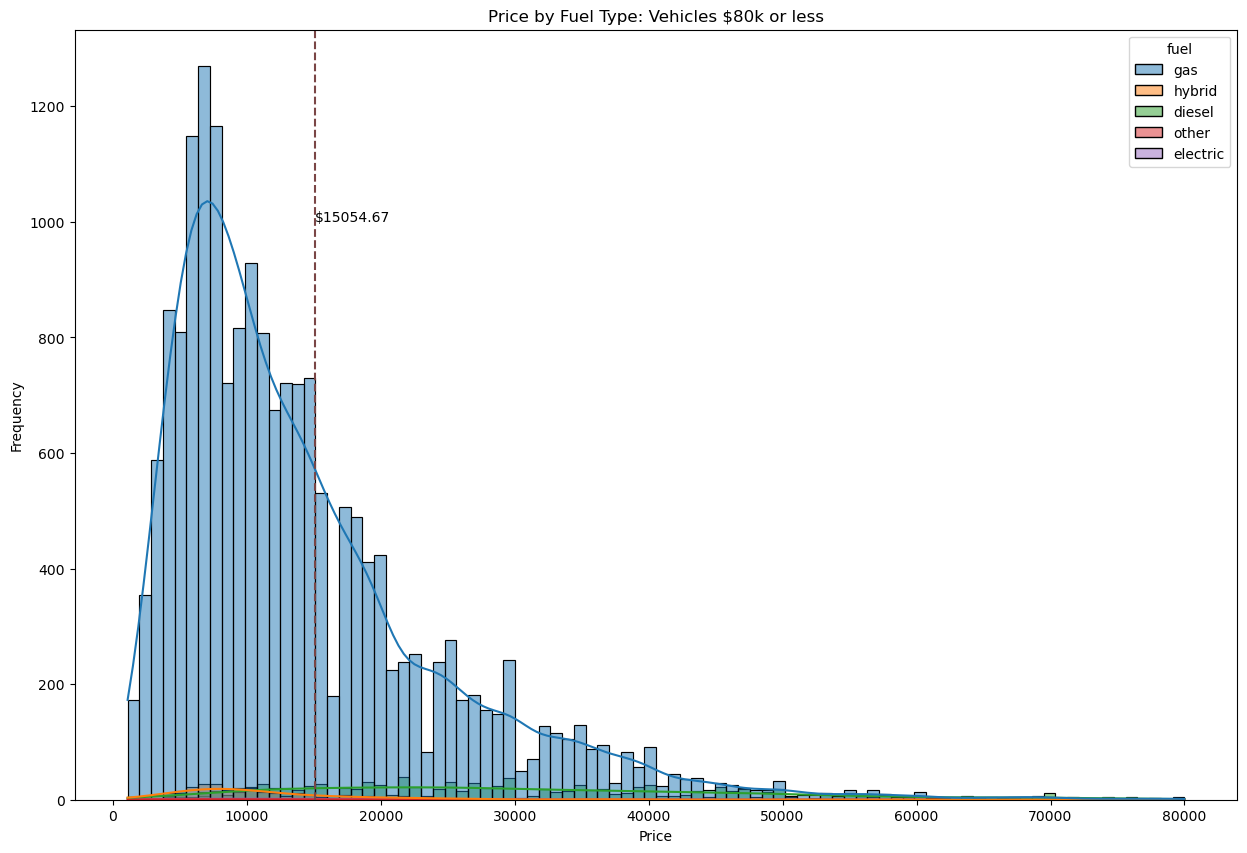

In [ ]:
#create a histogram of price by fuel type
#limit the price to 80,000
cars_df = cars_df[cars_df['price'] < 80000]
plt.figure(figsize=(15, 10))
sns.histplot(data=cars_df, x='price', hue='fuel', kde=True, palette='tab10')
plt.title('Price by Fuel Type: Vehicles $80k or less')
avg_price = cars_df['price'].mean()
plt.axvline(avg_price, color='#7a4646', linestyle='--', label='Average Price')
plt.text(avg_price, 1000, f'${round(avg_price, 2)}', rotation=0, color='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



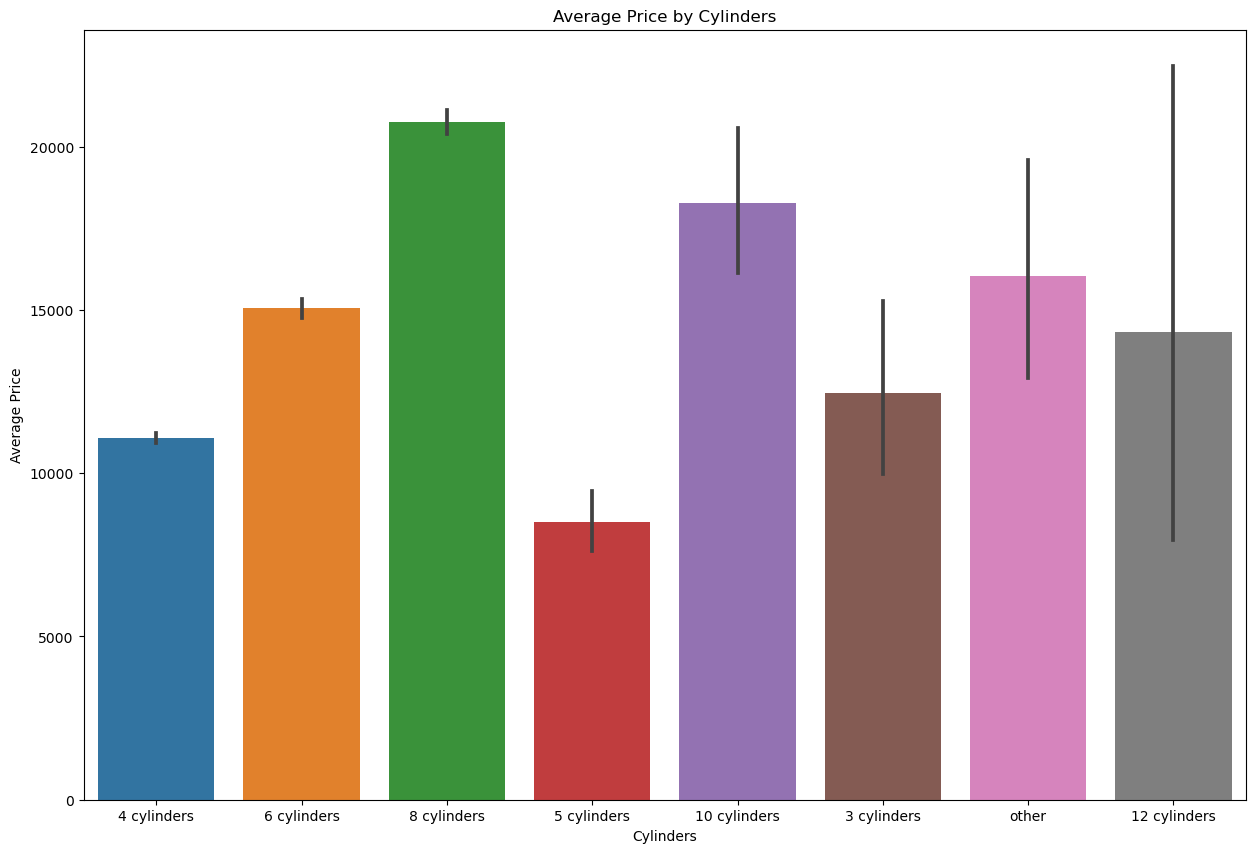

In [ ]:
#average price by cylinders
plt.figure(figsize=(15, 10))
sns.barplot(data=cars_df, x='cylinders', y='price', palette='tab10')

plt.title('Average Price by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Average Price')
plt.show()



In [ ]:
#table of prices average prices by cylinder type, including vehicle count for scale
cylinder_fuel_avg_price = cars_df.groupby(['cylinders', 'fuel'])['price'].mean()
cylinder_fuel_avg_price = cylinder_fuel_avg_price.round(2)
cylinder_fuel_avg_price = pd.DataFrame(cylinder_fuel_avg_price)
cylinder_fuel_avg_price['count'] = cars_df.groupby(['cylinders', 'fuel'])['price'].count()
cylinder_fuel_avg_price


price  count
cylinders    fuel                     
10 cylinders diesel    29475.00      2
             gas       18169.30    105
             other     12947.50      2
12 cylinders diesel    10747.50      2
             gas       15118.22      9
3 cylinders  gas       12467.76     34
4 cylinders  diesel    14633.13     82
             electric  13448.42     12
             gas       11058.22   7034
             hybrid    10714.33    243
             other      8743.12      8
5 cylinders  diesel    16019.00      5
             gas        7984.54    202
             hybrid    41899.50      2
6 cylinders  diesel    31498.00    297
             gas       14310.35   6679
             hybrid    16642.36     22
             other     10399.50      2
8 cylinders  diesel    32896.11    655
             gas       19063.25   4656
             hybrid    16132.22      9
             other     16797.00     12
other        diesel    11864.17      6
             electric  19189.67     43
             gas        9859.60     15
             hybrid    10500.00      1
             other      4200.00      1

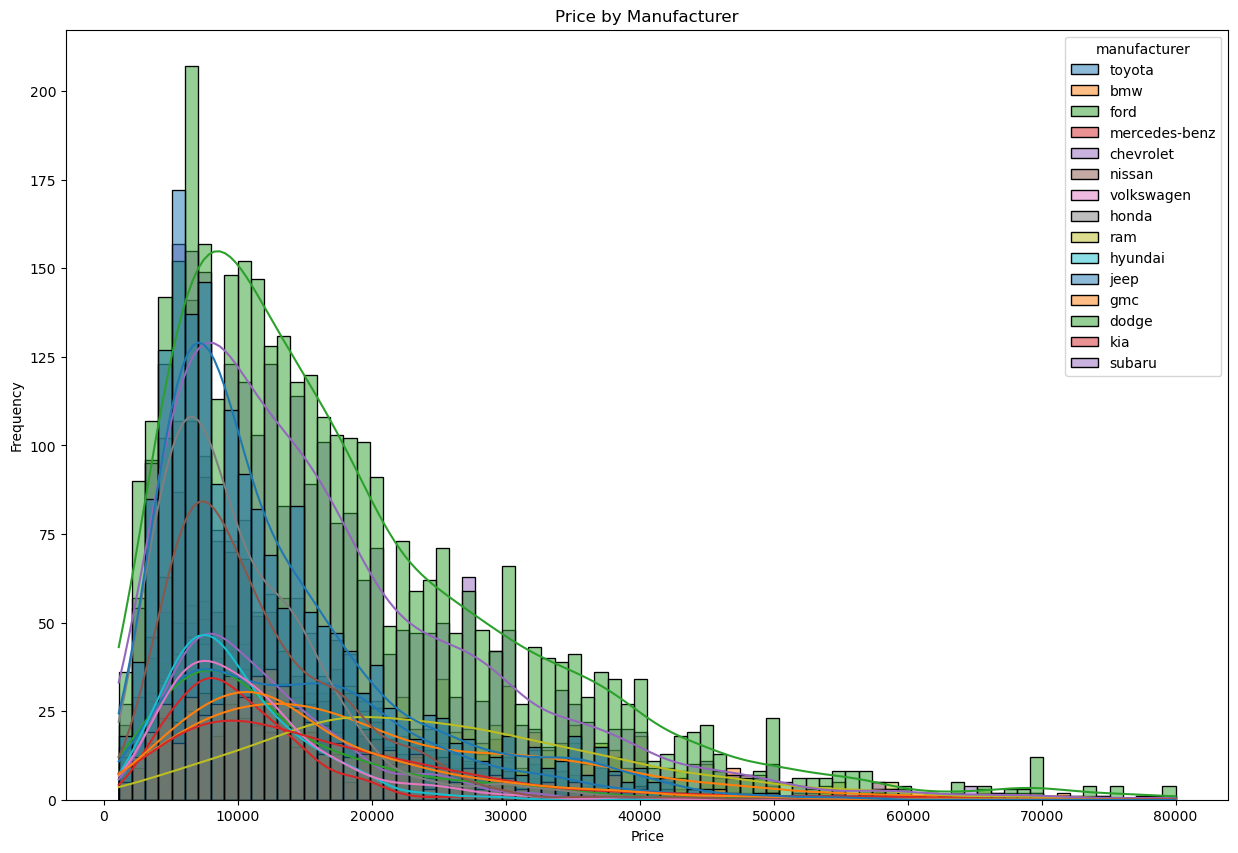

In [ ]:
#visualize vehicle pricing for the top 15 manufacturers
top_manufacturer_count = cars_df['manufacturer'].value_counts().nlargest(15)
top_manufacturer_count = pd.DataFrame(top_manufacturer_count)
top_manufacturer_count
#filter the cars_df to only include the top 15 manufacturers
top_manufacturer = cars_df[cars_df['manufacturer'].isin(top_manufacturer_count.index)]


plt.figure(figsize=(15, 10))
sns.histplot(data=top_manufacturer , x='price', hue='manufacturer', kde=True, palette='tab10')
plt.title('Price by Manufacturer')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#average price by top manufacturer
manufacturer_avg_price = top_manufacturer.groupby('manufacturer')['price'].mean()
manufacturer_avg_price = manufacturer_avg_price.round(2)
manufacturer_avg_price = pd.DataFrame(manufacturer_avg_price)
manufacturer_avg_price['count'] = top_manufacturer.groupby('manufacturer')['price'].count()
manufacturer_avg_price

,price,count
manufacturer,,
bmw,15328.29,571
chevrolet,16789.00,2764
dodge,12802.10,593
ford,18246.47,3620
gmc,21291.79,785
honda,10238.35,1316
hyundai,9732.51,520
jeep,15822.13,850
kia,10011.30,394
